In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import random

In [2]:
ed_exp = pd.read_csv("Resources/government-expenditure-on-education.csv")
ed_grad = pd.read_csv('Resources/EAG_GRAD_ENTR_RATES_06022021014126375.csv')
crm_pers_held = pd.read_csv('Resources/crime_persons_held.csv')

In [3]:
recent_ed_exp=ed_exp.loc[ed_exp["Year"]>=2012]
recent_ed_exp

,Entity,Code,Year,"Government expenditure on education, total (% of GDP)"
10,Afghanistan,AFG,2012,2.52441
11,Afghanistan,AFG,2013,3.47171
12,Afghanistan,AFG,2014,3.77759
13,Afghanistan,AFG,2015,3.24202
28,Albania,ALB,2013,3.53930
...,...,...,...,...
3562,Vietnam,VNM,2012,5.53329
3563,Vietnam,VNM,2013,5.65200
3610,Zimbabwe,ZWE,2012,7.29443
3611,Zimbabwe,ZWE,2013,7.40817


In [4]:
recent_ed_exp=recent_ed_exp.drop('Code', axis=1)
recent_ed_exp

,Entity,Year,"Government expenditure on education, total (% of GDP)"
10,Afghanistan,2012,2.52441
11,Afghanistan,2013,3.47171
12,Afghanistan,2014,3.77759
13,Afghanistan,2015,3.24202
28,Albania,2013,3.53930
...,...,...,...
3562,Vietnam,2012,5.53329
3563,Vietnam,2013,5.65200
3610,Zimbabwe,2012,7.29443
3611,Zimbabwe,2013,7.40817


In [5]:
ed_exp_mean=recent_ed_exp.groupby("Entity")["Government expenditure on education, total (% of GDP)"].mean()

In [6]:
ed_exp_mean=ed_exp_mean.reset_index()
ed_exp_mean

,Entity,"Government expenditure on education, total (% of GDP)"
0,Afghanistan,3.253932
1,Albania,3.496470
2,Andorra,2.991917
3,Argentina,5.504788
4,Armenia,2.645420
...,...,...
143,United Kingdom,5.647870
144,United States,5.042710
145,Vanuatu,5.230350
146,Vietnam,5.592645


In [7]:
ed_exp_mean=ed_exp_mean.rename(columns={'Entity':'Country'})

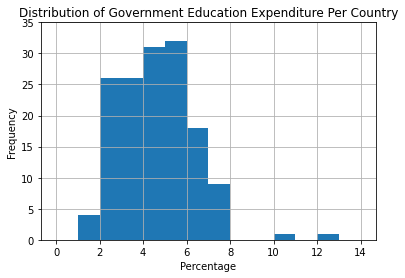

In [8]:
ed_exp_mean['Government expenditure on education, total (% of GDP)'].plot(kind='hist',bins=list(range(15)))
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Government Education Expenditure Per Country')
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35])
plt.savefig('Output/histogram_government_edu_exp.png')
plt.grid()
#create border around bars (if possible)

In [54]:
ed_exp_mean=ed_exp_mean.set_index('Country')

In [55]:
top_exp = ed_exp_mean.sort_values(by='Government expenditure on education, total (% of GDP)',ascending=False)
top_20=top_exp.head(20)
top_20=top_20.set_index('Country')
top_20

KeyError: "None of ['Country'] are in the columns"

In [11]:
bottom_exp = ed_exp_mean.sort_values(by='Government expenditure on education, total (% of GDP)')
bottom_20=bottom_exp.head(20)
bottom_20=bottom_20.set_index('Country')
bottom_20

,"Government expenditure on education, total (% of GDP)"
Country,
Monaco,1.376853
South Sudan,1.560855
Bermuda,1.654863
Cambodia,1.828213
Guinea-Bissau,2.066775
Sri Lanka,2.154724
Myanmar,2.165700
Bangladesh,2.213993
Democratic Republic of Congo,2.267855


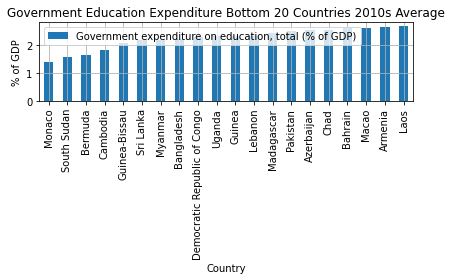

In [56]:
bottom_20.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('% of GDP')
plt.title('Government Education Expenditure Bottom 20 Countries 2010s Average')
plt.grid()
plt.tight_layout()
plt.savefig("Output/bottom_20_expenditure.png")

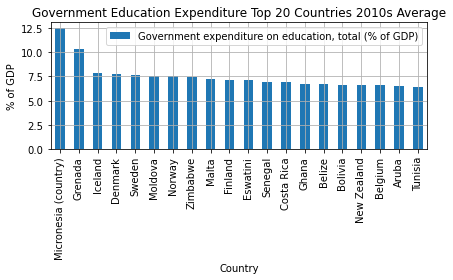

In [13]:
top_20.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('% of GDP')
plt.title('Government Education Expenditure Top 20 Countries 2010s Average')
plt.grid()
plt.tight_layout()
plt.savefig("Output/top_20_expenditure.png")

In [14]:
ed_grad=ed_grad.drop(['COUNTRY', 'SEX','AGE', 'COUNTRY_ORIGIN', 'International students exclusion', 'ISC11_LEVEL_CAT', 'INDICATOR', 'Indicator', 'YEAR', 'Flag Codes','Flags'], axis=1)

In [15]:
ed_grad=ed_grad.loc[ed_grad['Year']>=2012]

In [16]:
ed_grad=ed_grad.dropna(subset=['Value'])

In [17]:
new=ed_grad.rename(columns={'Education level and programe orientation ':'Education Level'})
new

,Country,Gender,Age,Education Level,Year,Value
3,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2012,48.375
4,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2013,52.810
5,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2014,54.062
6,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2015,54.794
7,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2016,59.266
...,...,...,...,...,...,...
23413,Denmark,Men,Less than 30,Short-cycle tertiary education (ISCED2011 leve...,2014,7.714
23414,Denmark,Men,Less than 30,Short-cycle tertiary education (ISCED2011 leve...,2015,8.439
23415,Denmark,Men,Less than 30,Short-cycle tertiary education (ISCED2011 leve...,2016,9.008
23416,Denmark,Men,Less than 30,Short-cycle tertiary education (ISCED2011 leve...,2017,8.883


In [18]:
bach_ed=new.loc[new['Education Level']=='Bachelor’s or equivalent level (ISCED2011 level 6)']
bach_ed=bach_ed.groupby('Country')['Value'].mean()
bach_ed=bach_ed.reset_index()
bach_ed=bach_ed.set_index('Country')
bach_ed

,Value
Country,
Australia,42.231148
Austria,19.641443
Belgium,39.308692
Canada,33.080941
Chile,28.537382
China (People's Republic of),21.056000
Colombia,16.741667
Czech Republic,30.705212
Denmark,44.371557


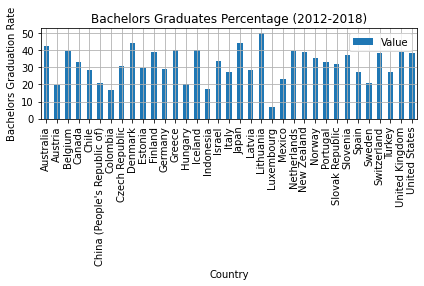

In [19]:
bach_ed.plot(kind='bar')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.xlabel('Country')
plt.ylabel('Bachelors Graduation Rate')
plt.title('Bachelors Graduates Percentage (2012-2018)')
plt.tight_layout()
plt.grid()
plt.savefig("Output/bachelors_grad.png")

In [20]:
master_ed=new.loc[new['Education Level']=='Master’s or equivalent level (ISCED2011 level 7)']
master_ed=master_ed.groupby('Country')['Value'].mean()
master_ed=master_ed.reset_index()
master_ed=master_ed.set_index('Country')
master_ed

,Value
Country,
Australia,10.234230
Austria,15.989393
Belgium,13.237077
Canada,8.464647
Chile,6.746059
China (People's Republic of),2.138333
Colombia,6.446667
Czech Republic,21.530096
Denmark,24.164623


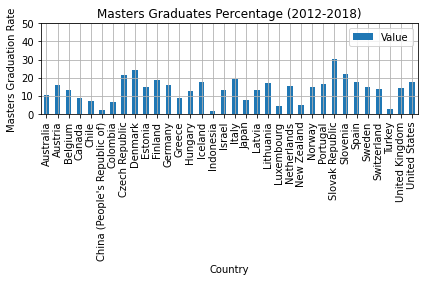

In [21]:
master_ed.plot(kind='bar')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.xlabel('Country')
plt.ylabel('Masters Graduation Rate')
plt.title('Masters Graduates Percentage (2012-2018)')
plt.tight_layout()
plt.grid()
plt.savefig("Output/masters_grad.png")

In [22]:
doc_ed=new.loc[new['Education Level']=='Doctoral or equivalent level  (ISCED2011 level 8)']
doc_ed=doc_ed.groupby('Country')['Value'].mean()
doc_ed=doc_ed.reset_index()
doc_ed=doc_ed.set_index('Country')
doc_ed

,Value
Country,
Australia,1.182459
Austria,1.273311
Belgium,0.571365
Canada,0.928451
Chile,0.145135
China (People's Republic of),0.219000
Colombia,0.024333
Czech Republic,1.144782
Denmark,1.799639


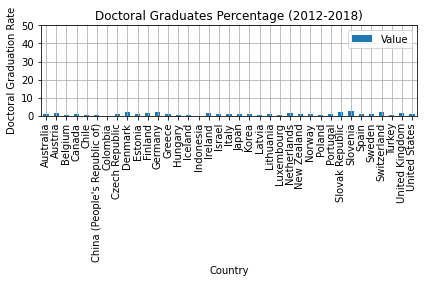

In [23]:
doc_ed.plot(kind='bar')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.xlabel('Country')
plt.ylabel('Doctoral Graduation Rate')
plt.title('Doctoral Graduates Percentage (2012-2018)')
plt.tight_layout()
plt.grid()
plt.savefig("Output/doctoral_grad.png")

In [24]:
high_school=new.loc[new['Education Level']=='Upper secondary education (ISCED2011 level 3)']
high_school

,Country,Gender,Age,Education Level,Year,Value
113,Latvia,Men,Less than 25,Upper secondary education (ISCED2011 level 3),2012,86.940
114,Latvia,Men,Less than 25,Upper secondary education (ISCED2011 level 3),2013,80.468
115,Latvia,Men,Less than 25,Upper secondary education (ISCED2011 level 3),2014,83.246
116,Latvia,Men,Less than 25,Upper secondary education (ISCED2011 level 3),2015,81.468
117,Latvia,Men,Less than 25,Upper secondary education (ISCED2011 level 3),2016,80.639
...,...,...,...,...,...,...
23403,Turkey,Women,Less than 25,Upper secondary education (ISCED2011 level 3),2014,65.791
23404,Turkey,Women,Less than 25,Upper secondary education (ISCED2011 level 3),2015,70.456
23405,Turkey,Women,Less than 25,Upper secondary education (ISCED2011 level 3),2016,73.575
23406,Turkey,Women,Less than 25,Upper secondary education (ISCED2011 level 3),2017,74.471


In [25]:
high_school=high_school.groupby('Country')['Value'].mean()
high_school=high_school.reset_index()
high_school

,Country,Value
0,Austria,82.093143
1,Belgium,31.063250
2,Brazil,59.883600
3,Canada,84.755952
4,Chile,85.456190
5,Colombia,71.649889
6,Costa Rica,35.111083
7,Czech Republic,77.204286
8,Denmark,81.617905
9,Estonia,82.841667


In [27]:
high_school=high_school.set_index('Country')

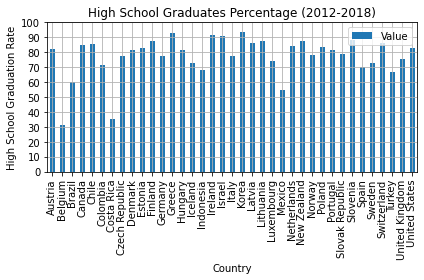

In [48]:
high_school.plot(kind='bar')
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlabel('Country')
plt.ylabel('High School Graduation Rate')
plt.title('High School Graduates Percentage (2012-2018)')
plt.tight_layout()
plt.grid()
plt.savefig("Output/high_school_grad.png")

In [30]:
crm_pers_held

,Region,Subregion,Country,Source,Year,count,rate
0,Asia,Southern Asia,Afghanistan,WPB-ICPR,2003,NaN,NaN
1,Europe,Southern Europe,Albania,UN-CTS,2003,2561.0,82.135985
2,Africa,Northern Africa,Algeria,UN-CTS/WPB-ICPR,2003,39806.0,123.375899
3,Oceania,Polynesia,American Samoa,WPB-ICPR,2003,NaN,NaN
4,Europe,Southern Europe,Andorra,UN-CTS/WPB-ICPR,2003,61.0,83.561644
...,...,...,...,...,...,...,...
3595,Europe,Western Europe,Belgium,WPB-ICPR/UN-CTS,2014,11769.0,104.883700
3596,Europe,Western Europe,Belgium,WPB-ICPR/UN-CTS,2015,10994.0,97.395464
3597,Europe,Western Europe,Belgium,WPB-ICPR/UN-CTS,2016,11071.0,97.507486
3598,Europe,Western Europe,Belgium,WPB-ICPR/UN-CTS,2017,10073.0,88.204904


In [33]:
crm_pers_held=crm_pers_held.loc[crm_pers_held["Year"]>=2012]

In [31]:
crm_pers_held=crm_pers_held.drop(['Region','Subregion','Source', 'count'], axis=1)
crm_pers_held

,Country,Year,rate
0,Afghanistan,2003,NaN
1,Albania,2003,82.135985
2,Algeria,2003,123.375899
3,American Samoa,2003,NaN
4,Andorra,2003,83.561644
...,...,...,...
3595,Belgium,2014,104.883700
3596,Belgium,2015,97.395464
3597,Belgium,2016,97.507486
3598,Belgium,2017,88.204904


In [32]:
crm_pers_held=crm_pers_held.dropna(subset=['rate'])
crm_pers_held

,Country,Year,rate
1,Albania,2003,82.135985
2,Algeria,2003,123.375899
4,Andorra,2003,83.561644
5,Angola,2003,33.154903
9,Armenia,2003,94.632207
...,...,...,...
3595,Belgium,2014,104.883700
3596,Belgium,2015,97.395464
3597,Belgium,2016,97.507486
3598,Belgium,2017,88.204904


In [35]:
df_rate=crm_pers_held.groupby('Country')['rate'].mean()
df_rate=df_rate.reset_index()
df_rate=df_rate.set_index('Country')

,rate
Country,
United States of America,687.318718
Belize,585.390895
Seychelles,580.884509
Saint Kitts and Nevis,578.611161
Turkmenistan,549.262508
...,...
State of Palestine,22.927270
Comoros,22.548448
Faeroe Islands,18.402778


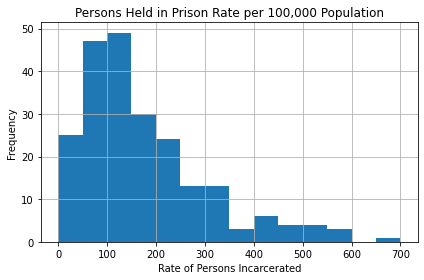

In [36]:
bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700]
df_rate['rate'].plot(kind='hist', bins=bins)
plt.xlabel('Rate of Persons Incarcerated')
plt.ylabel('Frequency')
plt.title('Persons Held in Prison Rate per 100,000 Population')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.tight_layout()
plt.grid()
plt.show
plt.savefig('Output/histogram_persons_imprisoned.png')
#create border around bars (if possible)

In [42]:
top20_inc=df_rate.sort_values(by='rate',ascending=False)
top20_inc=top20_inc.head(20)
top20_inc

,rate
Country,
United States of America,687.318718
Belize,585.390895
Seychelles,580.884509
Saint Kitts and Nevis,578.611161
Turkmenistan,549.262508
United States Virgin Islands,546.931716
El Salvador,524.030888
Cuba,509.345296
Rwanda,499.333523


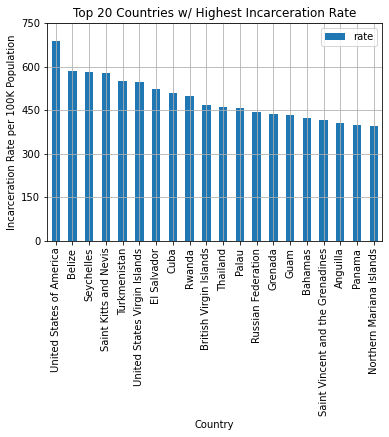

In [49]:
top20_inc.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Incarceration Rate per 100K Population')
plt.title('Top 20 Countries w/ Highest Incarceration Rate')
plt.yticks([0, 150, 300, 450, 600, 750])
plt.grid()
plt.savefig("Output/top_20_inc.png")

In [57]:
merge1=pd.concat([ed_exp_mean, high_school, bach_ed, master_ed, doc_ed, df_rate], axis=1)
merge1.columns=['Government Expenditure','High School', 'Bachelors', 'Masters', 'Doctoral', 'Incarceration Rate']
merge1

,Government Expenditure,High School,Bachelors,Masters,Doctoral,Incarceration Rate
Afghanistan,3.253932,NaN,NaN,NaN,NaN,80.369164
Albania,3.496470,NaN,NaN,NaN,NaN,189.145260
Andorra,2.991917,NaN,NaN,NaN,NaN,56.551764
Argentina,5.504788,NaN,NaN,NaN,NaN,166.930236
Armenia,2.645420,NaN,NaN,NaN,NaN,127.609576
...,...,...,...,...,...,...
Uzbekistan,NaN,NaN,NaN,NaN,NaN,143.451969
Venezuela (Bolivarian Republic of),NaN,NaN,NaN,NaN,NaN,173.458653
Viet Nam,NaN,NaN,NaN,NaN,NaN,144.894522
Yemen,NaN,NaN,NaN,NaN,NaN,54.943940


In [ ]:
x_values=merge1['High School']
y_values=merge1['Incarceration Rate']
plt.scatter(x_values,y_values,edgecolor='black')
plt.title('High School Graduation vs. Incarceration Rates')
plt.xlabel('Graduation Rate')
plt.ylabel('Incarceration Rate')
plt.grid()
#plt.savefig('output_data/high_school_and_incarceration_rate.png')

In [ ]:
x_values=merge1['Bachelors']
y_values=merge1['Incarceration Rate']
plt.scatter(x_values,y_values,edgecolor='black')
plt.title('Bachelors Graduation vs. Incarceration Rates')
plt.xlabel('Graduation Rate')
plt.ylabel('Incarceration Rate')
plt.grid()
#plt.savefig('output_data/bachelors_and_incarceration_rate.png')

In [ ]:
x_values=merge1['Masters']
y_values=merge1['Incarceration Rate']
plt.scatter(x_values,y_values,edgecolor='black')
plt.title('Masters Graduation vs. Incarceration Rates')
plt.xlabel('Graduation Rate')
plt.ylabel('Incarceration Rate')
plt.grid()
#plt.savefig('output_data/masters_and_incarceration_rate.png')

In [ ]:
x_values=merge1['Doctoral']
y_values=merge1['Incarceration Rate']
plt.scatter(x_values,y_values,edgecolor='black')
plt.title('Doctoral Graduation vs. Incarceration Rates')
plt.xlabel('Graduation Rate')
plt.ylabel('Incarceration Rate')
plt.grid()
#plt.savefig('output_data/doctoral_and_incarceration_rate.png')

In [ ]:
len(crm_enter) #no countries were excluded

In [ ]:
len(high_school_ed) #excluding 10 countries by dropping certain things

In [ ]:
len(bach_ed) #excluding 15 countries by dropping certain things

In [ ]:
len(master_ed) #excluding 15 countries by dropping certain things

In [ ]:
len(doc_ed) #excluding 17 countries by dropping certain things

In [ ]:
len(df_rate) #excluding 3 countries by dropping certain things